Module imports


In [840]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt


Sigmoid Function and its derivative


In [841]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Derivative of the sigmoid function
def dsigmoid(x):
    return np.exp(-x) / (1 + np.exp(-x)) ** 2


Cost function and its derivative

In [842]:
# Cost function
def cost(V, y):
    return (V - y) ** 2


# Derivative of the cost function
def dcost(V, y):
    return 2 * (V - y)


Z function

In [843]:
# The output of a layer (before being passed to the sigmoid
# function)
def z(X, W, B):
    return np.dot(X, W) + B


Forward propagation

In [844]:
# Performs forward propagation and returns the values of z
# and the activations
def forward_prop(X, params):
    W1 = params["W1"]
    B1 = params["B1"]
    W2 = params["W2"]
    B2 = params["B2"]

    Z1 = z(X, W1, B1)
    A1 = sigmoid(Z1)
    Z2 = z(A1, W2, B2)
    A2 = sigmoid(Z2)

    return {
        "Z1": Z1,
        "Z2": Z2,
        "A1": A1,
        "A2": A2,
    }


# Directly get output activations
def outputs(X, params):
    return forward_prop(X, params)["A2"]


Back propagation

In [845]:
# Performs back propagation and returns the adjustment to be
# that should applied to weights and biases
def back_prop(X, y, params, activations):
    W1 = params["W1"]
    B1 = params["B1"]
    W2 = params["W2"]
    B2 = params["B2"]

    Z1 = activations["Z1"]
    Z2 = activations["Z2"]
    A1 = activations["A1"]
    A2 = activations["A2"]

    m = y.shape[1]

    dZ2 = dsigmoid(Z2) * dcost(A2, y.T)
    dZ1 = dsigmoid(Z1) * np.dot(dZ2, W2.T)

    dW2 = np.dot(A1.T, dZ2)
    dB2 = np.average(dZ2, axis=0, keepdims=True)

    dW1 = np.dot(X.T, dZ1)
    dB1 = np.average(dZ1, axis=0, keepdims=True)

    return {
        "dW1": dW1,
        "dB1": dB1,
        "dW2": dW2,
        "dB2": dB2,
    }


Training the network

In [846]:
def init_params(n0, n1, n2):
    return {
        "W1": default_rng().random((n0, n1)),
        "B1": default_rng().random((1, n1)),
        "W2": default_rng().random((n1, n2)),
        "B2": default_rng().random((1, n2)),
    }


def update_params(params, adjustments, learning_rate):
    return {p: params[p] - adjustments[a] * learning_rate for p, a in zip(params, adjustments)}


def train(X, y, n_neurons=3, learning_rate=0.1, n_iter=1000):
    n0 = X.shape[1]
    n2 = y.shape[1]
    params = init_params(n0, n_neurons, n2)

    cost_values = []
    accuracy_values = []

    for i in range(n_iter):
        results = forward_prop(X, params)
        adjusted_params = back_prop(X, y, params, results)
        params = update_params(params, adjusted_params, learning_rate)

        cost_values.append(np.average(cost(results["A2"], y).flatten()))
        accuracy_values.append(np.average((y / results["A2"]).flatten()))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(cost_values, label="cost")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(accuracy_values, label="accuracy")
    plt.legend()
    plt.show()

    return params


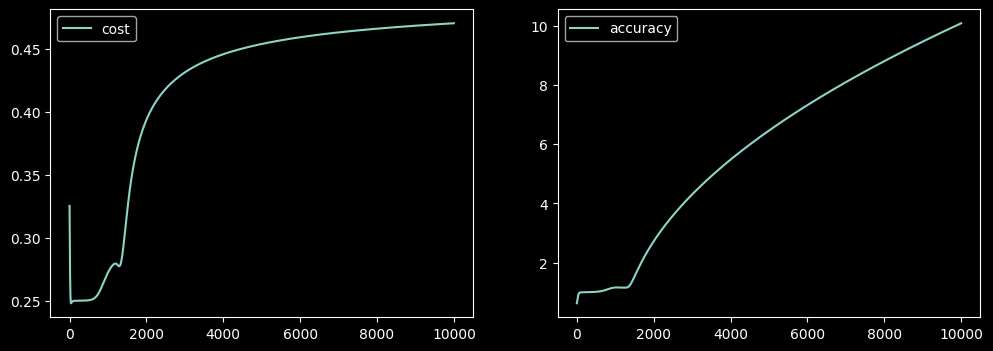

In [847]:
# XOR gate example

# Input values
X = np.array(
    [
        [1, 1],
        [0, 0],
        [1, 0],
        [0, 1],
    ]
)
# Expected output values (depending on X values)
y = np.array(
    [
        [
            0,
            0,
            1,
            1,
        ]
    ]
)

adjusted_params = train(X, y, n_neurons=2, n_iter=10000)


In [849]:
out = outputs(np.array([1, 0]), adjusted_params).flatten()
out_average = np.average(out)

print(out)
print(out_average)
print(out_average >= 0.5)


[0.95508427 0.95510058 0.95509855 0.95514598]
0.9551073450952436
True
